## Class 2: Linear Algebra and Stats in Python
### Agenda:
* **An overview of how to work with matrices and vectors in Python (this notebook)**
* **An overview of probabilities and probability distributions in Python (next notebook)**

### Outline of this notebook
* **scalars and scalar operations**
* **vectors and vector operations**
* **matrices and basic matrix operations**
* **matrix inverse**
* **matrix transpose**

Ok, so last time we had a whirlwind tour of basic `Python`.

Now we will have provide you with a linear algebra foundation, and experiment a bit in `Python` using the [NumPy library](http://www.numpy.org/). 

`NumPy` is a library (a collection of functions and datatypes) that extends the numerical capabilities of pure `Python` to work very quickly (and well) with matrices and vectors. `NumPy` is a core component of the [**`Python` scientific stack**](http://www.scipy.org/index.html), and we will be using it a lot as we proceed through the course.

Matrices and vectors are parts of the mathematical bedrock that data scientists rely on, on a daily basis. 

In order to succeed as a data scientist, we need to understand how to work, in a limited way, with matrices and vectors, so we will spend this portion of the class working with both kinds of objects. 

**Going forward, we will infrequently work with matrices and vectors directly, but it is nonetheless important to understand some of their basic properties to be productive as we progress through this course.**

Now, some plumbing issues/explanations.

In order to use `numpy` within a given `Python` program or script, we need to `import` it into our program's namespace. 

This is just a way of saying, in order for our `Python` code to rely on all of the cool `numpy` functionality, we need to tell our program to use it (it doesn't get baked into our program by default).

So let's do that:

In [1]:
import numpy as np

What we've done is told `Python` "give me all the functionality of numpy, but whenever I call a numpy function, I don't want to say numpy.BLAH, instead, I want to say np.BLAH."

Make sense?

This is a **convention** in the `Python` world. Many packages that are used by developers and data scientists have conventional renamings, and I will attempt to use them throughout the course (If I know the convention :)).

I'll also allow for us to use matplotlib throughout this notebook.

In [2]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Linear Systems

Ok, the linear system focused on in class involves these two equestions:

- y = 800 + 20x
- y = 1 + 100x

Let's plot them:

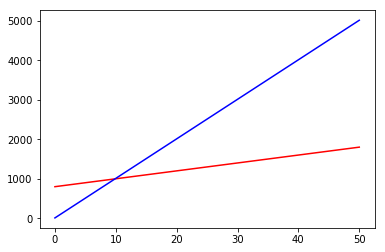

In [5]:
x = np.linspace(0, 50, 1000)
y1 = 20*x +800
y2 = 100*x + 10

plt.plot(x, y1, color='red')
plt.plot(x, y2, c='blue')

### Gaussian Elimination / solving the augmented matrix
**You won't need to know how to do this.** I have only provided it here for reference in case you'd like to understand what's happening behind the scenes.

Matrix Row Operations Rules:

- Any Two Rows can be Swapped
- Any row can be multiplied by a nonzero constant
- Any row can be added to another row

First, let's define our matrix

In [6]:
matrix = np.array([[20, -1, -80],
                   [100, -1, -10]
                  ], dtype=np.float32)
matrix

array([[ 20.,  -1., -80.],
       [100.,  -1., -10.]], dtype=float32)

Let's transform Row 1 (R1) by multiplying it by 1/20

R1 = R1 * (1/20)

In [10]:
matrix[0] = matrix[0] / 20
matrix

array([[  5.00000007e-02,   0.00000000e+00,   4.37499993e-02],
       [  0.00000000e+00,   1.00000000e+00,   9.75000000e+01]], dtype=float32)

R2 = R2 - (R1 * 100)

In [7]:
matrix[1] = matrix[1] - (matrix[0] * 100)
matrix

array([[  1.00000000e+00,  -5.00000007e-02,  -4.00000000e+00],
       [  0.00000000e+00,   4.00000000e+00,   3.90000000e+02]], dtype=float32)

R2 = R2 * (1/4)

In [8]:
matrix[1] = matrix[1] / 4
matrix

array([[  1.00000000e+00,  -5.00000007e-02,  -4.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   9.75000000e+01]], dtype=float32)

R1 = R1 + R2 * (1/20)

In [9]:
matrix[0] = matrix[0] + matrix[1] * (1/20)
matrix

array([[  1.   ,   0.   ,   0.875],
       [  0.   ,   1.   ,  97.5  ]], dtype=float32)

### Scalars

A scalar `NumPy` is just an individual number, just a mathy way of saying it. This is what we use when we add two numbers together, multiply them together, etc. You (intuitively) know what a scalar is:

In [7]:
x = 3.4
print("This is a scalar:",x)

This is a scalar: 3.4


### Vectors

Vectors are just arrays (lists) of scalars. They are created in a very specific way in `Numpy`, by using the function `array` and can either be created directly, or **cast** from a list:

In [8]:
an_array = np.array([1,20,34,12])
print(an_array,type(an_array))

[ 1 20 34 12] <class 'numpy.ndarray'>


In [9]:
my_list = [30,3.5,12]
an_array_from_list = np.array(my_list)
print(an_array_from_list, type(an_array_from_list))

[30.   3.5 12. ] <class 'numpy.ndarray'>


However, unlike lists in pure `Python`, `NumPy` arrays are very different, in that they **must have scalars of all the same type in them.** 

`NumPy` is it automatically casts your lists into what it thinks is the most intuitive datatype for the array, given all of the values in it.

So, if you have a list of `floats` and `ints`, you'll get a `NumPy` array that is all floats:

In [10]:
my_float_and_int_list = [1,2.5,12]
my_float_array = np.array(my_float_and_int_list)
print(my_float_array, my_float_array.dtype)
print(my_float_array[0], type(my_float_array[0])) #see?

[ 1.   2.5 12. ] float64
1.0 <class 'numpy.float64'>


Same goes for ints

In [13]:
my_int_list = [1, 2, 3, 4]
my_int_array = np.array(my_int_list)
print(my_int_array, my_int_array.dtype)

[1 2 3 4] int64


As you'll see later, having all ints could become an issue when doing vector operations, it could cause you to lose precision. You can fix this by defining the datatype when creating the vector.

In [14]:
my_int_array = np.array(my_int_list, dtype=float32)
print(my_int_array, my_int_array.dtype)

[ 1.  2.  3.  4.] float32


You don't want to mix `strings` and numbers together, as you'll get behavior you might not have wanted:

In [11]:
my_list_of_strings_and_ints = ["hello",12,"15.8"]
my_string_array = np.array(my_list_of_strings_and_ints)
print(my_string_array, my_string_array.dtype)
print(my_string_array[1],type(my_string_array[1])) # 12 is now a string!

['hello' '12' '15.8'] <U5
12 <class 'numpy.str_'>


### Vector Operations

#### Vector Addition

In [14]:
vector_one = np.asarray([3, 1], dtype=np.float32)

vector_two = np.asarray([1, 2], dtype=np.float32)

vector_one + vector_two

array([4., 3.], dtype=float32)

You can add/subtract/multiply/divide 2 vectors together, this will cause them to be multiplied/added/subtracted/divided one by one. However, **the two vectors must be exactly the same shape**:

In [12]:
my_first_vector = np.array([10,12,13])
my_second_vector = np.array([1,4,3.5])
print("are the two vectors of the same shape?", my_first_vector.shape == my_second_vector.shape) #how you check for equality in Pyton
print("Original vectors:\t",my_first_vector, my_second_vector)
print("Added:\t\t\t",my_first_vector+my_second_vector)
print("Divided:\t\t",my_first_vector/my_second_vector)
print("Multiplied:\t\t",my_first_vector*my_second_vector)
print("Subtracted:\t\t",my_first_vector-my_second_vector)

are the two vectors of the same shape? True
Original vectors:	 [10 12 13] [1.  4.  3.5]
Added:			 [11.  16.  16.5]
Divided:		 [10.          3.          3.71428571]
Multiplied:		 [10.  48.  45.5]
Subtracted:		 [9.  8.  9.5]


#### Vector Scalar Multiplication

In [15]:
3 * vector_one

array([9., 3.], dtype=float32)

#### Vector Scalar Addition

In [17]:
# Make a guess on what will happen, and then uncomment (remove '#') to check.

#vector_one + 1

array([4., 2.], dtype=float32)

#### Try a bit of everything

When you have numeric 1-dimensional arrays (vectors, same thing). You can perform some cool math on them, like multiplying, dividing, adding to, subtracting from them by a scalar:

In [18]:
my_array = np.array([12,46,3.4])
print("Original array:\t\t",my_array)
my_mult_array = my_array * 3
print("Multiplied by 3:\t",my_mult_array)
my_div_array = my_array / 3
print("Divided by 3:\t\t",my_div_array)
my_sub_array = my_array - 3
print("Subtracted 3 from:\t",my_sub_array)
my_add_array = my_array + 3
print("Added 3 to:\t\t",my_add_array)

Original array:		 [12.  46.   3.4]
Multiplied by 3:	 [ 36.  138.   10.2]
Divided by 3:		 [ 4.         15.33333333  1.13333333]
Subtracted 3 from:	 [ 9.  43.   0.4]
Added 3 to:		 [15.  49.   6.4]


#### Filtering vectors

You can do other really cool things with arrays, like check each element in them for certain properties.

Lets say we only wanted to see those entries that are greater than 10 in `my_array`.

First, we want to find out which scalars in our array satisfy our condition (value > 10). Here's how we would do that:

In [19]:
my_array > 10

array([ True,  True, False])

So checking for a condition gives us a new array that is of type `bool`.

What we can then do is apply this same exact `boolean array` to our `original array` to get a new array that satisfies our condition:

In [37]:
greater_than_10_array = my_array[my_array>10]
print(greater_than_10_array) #cool huh?

[ 12.  46.]


Remember this from Pandas??

#### Exercise Time!!!
* create a `NumPy array` called `heights` = [6.5,7.3,5.1,4.9]
* multiply all of the heights by 4 and store that into a new variable called `huge_people`
* create a new array `basketballers` with only those entries in heights that are > 6
* create another array `little_people` with only those entries in heights that are < 5

In [21]:
#Fill in your work here:


### Matrices

Let's now come back to matrices, which are 2-dimensional vectors. They are a bit more complicated and have a lot more properties than vectors, but they are also infinitely more useful.

Let's start. Here's a simple 2X2 matrix:

Matrices are a bit different from vectors and scalars in that **all mathematical operations that are common in vectors/scalars can actually be performed in 2 very different ways on matrices**, either with individual values (scalars) or by combining 2 matrices using those operations.

To understand this, lets look at the two ways matrix addition/subtraction/division/multiplication can be performed.

#### Matrix addition/subtraction/division/multiplication with scalars

In [32]:
my_first_matrix = np.array([[20,12],[30,1]], dtype=float32)
print(my_first_matrix)

[[20. 12.]
 [30.  1.]]


In [33]:
print("Original matrix:\n", my_first_matrix)
scalar_addition_matrix = my_first_matrix + 5
print("Adding the value 5 to the matrix:\n",scalar_addition_matrix)
scalar_subtraction_matrix = my_first_matrix - 20
print("Subtracting 20 from the matrix:\n", scalar_subtraction_matrix)
scalar_division_matrix = my_first_matrix / 5
print("Dividing the matrix by 5:\n",scalar_division_matrix)
scalar_multiplication_matrix = my_first_matrix * 20
print("Multiplying the matrix by 20:\n", scalar_multiplication_matrix)

Original matrix:
 [[20. 12.]
 [30.  1.]]
Adding the value 5 to the matrix:
 [[25. 17.]
 [35.  6.]]
Subtracting 20 from the matrix:
 [[  0.  -8.]
 [ 10. -19.]]
Dividing the matrix by 5:
 [[4.  2.4]
 [6.  0.2]]
Multiplying the matrix by 20:
 [[400. 240.]
 [600.  20.]]


So, performing any operation with a matrix and a scalar causes the operation to be performed element-wise on the matrix. Lets move onto basic operations where both elements are matrices.

#### Matrix addition/subtraction with another matrix

**When matrix addition and subtraction are performed with two matrices, both matrices must have the same exact shape:**

In [34]:
my_second_matrix = np.array([[1,3],[6,7]])
my_third_matrix = np.array([[1,2,4],[1,3,5]])

print(my_first_matrix,my_first_matrix.shape)
print(my_second_matrix,my_second_matrix.shape)

print("Are my first and second matrices the same shape?",my_first_matrix.shape == my_second_matrix.shape)

print("You can add and subtract matrices of the same shape:\n",my_first_matrix + my_second_matrix,"\n")
print(my_first_matrix - my_second_matrix)

[[20. 12.]
 [30.  1.]] (2, 2)
[[1 3]
 [6 7]] (2, 2)
Are my first and second matrices the same shape? True
You can add and subtract matrices of the same shape:
 [[21. 15.]
 [36.  8.]] 

[[19.  9.]
 [24. -6.]]


If you ever try to add/subtract 2 matrices of different shape, `Python` will throw a `ValueError`:

In [35]:
print("But you can't do anything when the matrices have different shapes:")
print(my_first_matrix, my_first_matrix.shape)
print(my_third_matrix, my_third_matrix.shape)
print("Are my first and third matrices the same shape?",my_first_matrix.shape==my_third_matrix.shape)
my_first_matrix + my_third_matrix

But you can't do anything when the matrices have different shapes:
[[20. 12.]
 [30.  1.]] (2, 2)
[[1 2 4]
 [1 3 5]] (2, 3)
Are my first and third matrices the same shape? False


ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

### The Dot Product

Matrices can be multiplied either with other matrices or vectors. Both cases rely on the object you're multiplying with having an appropriate shape (but not necessarily the same shape as the first matrix!).

In all talk of operations on matrices and vectors going forward, we will talk about the first matrix/vector as the **first operand** and the second matrix/vector as the **second operand**.

**In order for multiplication of two matrices/vectors AxB to be defined, the number of columns in the first operand must equal the number of rows in the second operand. The resulting new matrix will have a number of rows equal to the number of rows in the first operand and the number of columns equal to the second operand.**

To multiply matrices, we use a slightly different notation, calling the `dot` operator on a `NumPy` array:

#### Dot Product with two vectors

In [36]:
vector_one = np.asarray([1, 3, -5], dtype=np.float32)

vector_two = np.asarray([4, -2, -1], dtype=np.float32)

vector_one.dot(vector_two); np.dot(vector_one, vector_two)

3.0

#### Dot Product with two matrices

In [37]:
matrix_one = np.array([[1, 2, 3],[4, 5, 6]])
matrix_two = np.array([[7, 8],[9, 10],[11, 12]])
dot_product = matrix_one.dot( matrix_two )
dot_product

array([[ 58,  64],
       [139, 154]])

In [38]:
print("First matrix:\n",my_first_matrix, my_first_matrix.shape)
print("Second matrix: \n", my_second_matrix, my_second_matrix.shape)
print("Result of multiplying first x second:\n", my_first_matrix.dot(my_second_matrix), my_first_matrix.dot(my_second_matrix).shape)
print("Result of multiplying second x first:\n", my_second_matrix.dot(my_first_matrix),my_second_matrix.dot(my_first_matrix).shape )

First matrix:
 [[20. 12.]
 [30.  1.]] (2, 2)
Second matrix: 
 [[1 3]
 [6 7]] (2, 2)
Result of multiplying first x second:
 [[ 92. 144.]
 [ 36.  97.]] (2, 2)
Result of multiplying second x first:
 [[110.  15.]
 [330.  79.]] (2, 2)


**Notice that AxB is not the same as BxA when multiplying matrices!**
Let's try the same thing with matrices of slightly different shape:

In [39]:
print("First matrix:\n",my_first_matrix,my_first_matrix.shape)
print("Other matrix:\n",my_third_matrix,my_third_matrix.shape)
print("First x Other:\n", my_first_matrix.dot(my_third_matrix), my_first_matrix.dot(my_third_matrix).shape)

First matrix:
 [[20. 12.]
 [30.  1.]] (2, 2)
Other matrix:
 [[1 2 4]
 [1 3 5]] (2, 3)
First x Other:
 [[ 32.  76. 140.]
 [ 31.  63. 125.]] (2, 3)


Will multiplying Other x First work?

Let's now try to multiply one of our matrices by a properly formed vector:

In [40]:
print("A matrix:\n", my_third_matrix,my_third_matrix.shape)
print("A vector:\n", my_first_vector, my_first_vector.shape)
print("matrix x vector:", my_third_matrix.dot(my_first_vector),my_third_matrix.dot(my_first_vector).shape)

A matrix:
 [[1 2 4]
 [1 3 5]] (2, 3)
A vector:
 [10 12 13] (3,)
matrix x vector: [ 86 111] (2,)


In [41]:
my_third_matrix.dot(my_first_vector), my_third_matrix.shape

(array([ 86, 111]), (2, 3))

### Matrix Inversion / Matrix division by another matrix 

In order to talk about matrix division, we must first introduce the concept of a matrix inverse, because matrix division can't exist without it.

Remember from common math that dividing a number X by a number Y (X/Y) is the exact same thing as (X * 1/Y), or taking the reciprocal of Y and multiplying by that number. 

Also remember that a number multiplied by its reciprocal gives you 1 (Y * 1/Y = 1).

For matrices, we have to do the same exact thing (take the reciprocal), and we also have to identify the matrix version of the number 1.

So, how do we do Y * 1/Y = 1 for matrices? 

In [44]:
my_first_matrix = np.array([[20, 12],[30, 1]], dtype=np.float32)

my_first_matrix_inverse = np.linalg.inv(my_first_matrix)
my_first_matrix_inverse

array([[-0.00294118,  0.03529412],
       [ 0.0882353 , -0.05882353]], dtype=float32)

So, what happens when you take the dot product of a matrix and that matrix's inverse?

In [45]:
my_first_matrix.dot(my_first_matrix_inverse)

array([[1.0000000e+00, 1.4901161e-08],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

You get what we call the **identity matrix**! It is called the identity matriy because, taking the dot product of it by a matrix of the same shape will give you back that matrix.

Getting the identity matrix back above makes sense. It's equivelant to the fact that dividing x by itself (x/x) returns 1. And 1 * x = x. 

You can also create an identity matrix using `np.eye(n)`, where n is the number of columns/rows (which will be of equal length).

In [46]:
print(np.eye(2)) #eye is the function that does this in Python
print("A matrix:\n", my_first_matrix)
print("A matrix times the identity matrix gives you the same matrix again:\n",my_first_matrix.dot(np.eye(2)))

[[1. 0.]
 [0. 1.]]
A matrix:
 [[20. 12.]
 [30.  1.]]
A matrix times the identity matrix gives you the same matrix again:
 [[20. 12.]
 [30.  1.]]


So, the reciprocal of some matrix A (lets call it `recipA`) is the matrix such that `A * recipA = I`.

This matrix `recipA` can only exist for square matrices, and is called the **matrix inverse**.

**Not all square matrices have inverses!**

We can compute the inverse of a matrix (if it exists) by using `np.linalg.inv`: 

So, now that we see what matrix inversion is, we can go back to answering the question of how to do matrix division:

* For any 2 matrices, A and B, for A/B to give an actual result, B must be square and have an inverse.
* To get A/B, just compute A x invB

In [47]:
print("First matrix:\n",my_first_matrix )#A
print("Second matrix:\n",my_second_matrix )#B
my_second_matrix_inverse = np.linalg.inv(my_second_matrix) #invB
print("First divided by second:\n",my_first_matrix.dot(my_second_matrix_inverse)) #A x invB

First matrix:
 [[20. 12.]
 [30.  1.]]
Second matrix:
 [[1 3]
 [6 7]]
First divided by second:
 [[ -6.18181818   4.36363636]
 [-18.54545455   8.09090909]]


What happens if we multiply the two vectors without the dot product?

In [43]:
my_first_matrix * np.eye(2)

array([[ 20.,   0.],
       [  0.,   1.]])

Do you see why? Here we're doing matrix scalar multiplication rather than finding the dot product.

#### Matrix transpose

To explain matrix transpose, let's take a matrix and a vector that we want to multiply together:

A = \begin{bmatrix}
  10 & 2 \\
  -1 & 5 \\
  3 & 3
 \end{bmatrix}
 
B  = \begin{bmatrix}
  2 & 3 & 31
  \end{bmatrix}

A is of shape (3,2) and B is of shape (1,3), so as the two objects stand, we can perform BxA, but AxB will throw a `ValueError`: 

In [48]:
A = np.array([[10,2],[-1,5],[3,3]])
B = np.array([[2,3,31]])
print("A:\n",A)
print("B:\n",B)
print("Shape of A and B: ",A.shape,B.shape)
print("B x A:\n", B.dot(A))
print("A x B:",A.dot(B))

A:
 [[10  2]
 [-1  5]
 [ 3  3]]
B:
 [[ 2  3 31]]
Shape of A and B:  (3, 2) (1, 3)
B x A:
 [[110 112]]


ValueError: shapes (3,2) and (1,3) not aligned: 2 (dim 1) != 1 (dim 0)

How can we mupltiply A x B without throwing an error?

We can take the transpose of A  and of B to make them both have the appropriate dimensions to allow the multiplication to work.

The matrix transpose simply switches row and column indices for any matrix, such that the rows = the columns and the columns = the rows.

A = \begin{bmatrix}
  10 & 2 \\
  -1 & 5 \\
  3 & 3
 \end{bmatrix}

transpose(A) = \begin{bmatrix}
  10 & -1 & 3 \\
  2 & 5 & 3
 \end{bmatrix}
 
B  = \begin{bmatrix}
  2 & 3 & 31
  \end{bmatrix}

transpose(B) = \begin{bmatrix}
  2 \\
  3 \\
  31
  \end{bmatrix}
 
 So, to get the proper multiplication to work where A is the first operand and B is the second operand, we can do transpose(A) x transpose(B):

In [50]:
A = np.array([[10,2],[-1,5],[3,3]])
B = np.array([[2,3,31]])
print("A:\n",A,A.shape)
print()
print("B:\n",B,B.shape)
print()
print("A':\n",A.T, A.T.shape)
print()
print("B':\n",B.T, B.T.shape)
print()
print("A' x B':\n",A.T.dot(B.T),A.T.dot(B.T).shape)

A:
 [[10  2]
 [-1  5]
 [ 3  3]] (3, 2)

B:
 [[ 2  3 31]] (1, 3)

A':
 [[10 -1  3]
 [ 2  5  3]] (2, 3)

B':
 [[ 2]
 [ 3]
 [31]] (3, 1)

A' x B':
 [[110]
 [112]] (2, 1)


### Exercise Time

I've dumped a whole bunch of linear algebra into here, so I want to get you to use some of it:
* Create a 3x3 matrix C = [[12,3,4],[1,-1,10],[2,5,-2]] and a 3 x 1 vector d = [[3,-2,10]]
* Does the inverse of C exist? What is it?
* Mutiply C x d
* Get d x C to work using transpose